In [357]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#ML Model
from sklearn.linear_model import LogisticRegression

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer

# Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,\
StratifiedKFold
from sklearn.metrics import f1_score

# Saving models

import pickle 
import joblib

from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score,roc_auc_score, SCORERS, mean_squared_error

## Load Data

In [21]:
df = pd.read_csv('hotel_bookings.csv',usecols=['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests'])
df.head()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1


In [22]:
df.describe()

,is_canceled,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,1.856403,0.103890,0.007949,0.221124,2.321149,0.062518,0.571363
std,0.482918,0.579261,0.398561,0.097436,0.652306,17.594721,0.245291,0.792798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,55.000000,10.000000,10.000000,21.000000,391.000000,8.000000,5.000000


In [23]:
df.describe(exclude='number')

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
count,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,5,177,8,5,10,3,4
top,City Hotel,BB,PRT,Online TA,TA/TO,A,No Deposit,Transient
freq,79330,92310,48590,56477,97870,85994,104641,89613


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        119390 non-null  object 
 1   is_canceled                  119390 non-null  int64  
 2   adults                       119390 non-null  int64  
 3   children                     119386 non-null  float64
 4   babies                       119390 non-null  int64  
 5   meal                         119390 non-null  object 
 6   country                      118902 non-null  object 
 7   market_segment               119390 non-null  object 
 8   distribution_channel         119390 non-null  object 
 9   reserved_room_type           119390 non-null  object 
 10  booking_changes              119390 non-null  int64  
 11  deposit_type                 119390 non-null  object 
 12  days_in_waiting_list         119390 non-null  int64  
 13 

## EDA

In [243]:
def countplot(columnName,canceled, dataFrame,topNumber=5):
    sns.countplot(dataFrame[dataFrame['is_canceled']==canceled][columnName],order=pd.value_counts(dataFrame[temp_df['is_canceled']==canceled][columnName]).iloc[:topNumber].index)
    plt.xticks(rotation='vertical')

In [26]:
df.head()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1


#### Customer Profile

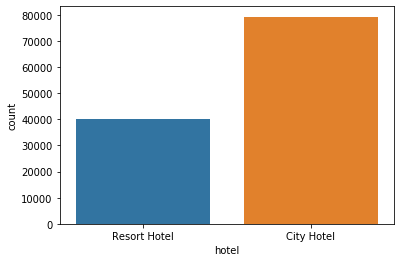

In [80]:
sns.countplot(df['hotel'])

There are more reservation towards City Hotel

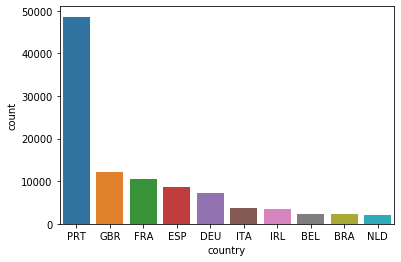

In [82]:
sns.countplot(df['country'],order=pd.value_counts(df['country']).iloc[:10].index)

Most of the booking are from the locals (Portuguese), and the foreign customers are dominated from Europe, lets try to separate the locals and the non-locals then divide by the hotel

In [134]:
def country(x):
    if x == 'PRT':
        return 'Locals'
    else:
        return 'Non-Locals'

In [135]:
temp_df = df.copy()
temp_df['country'] = df['country'].apply(country)

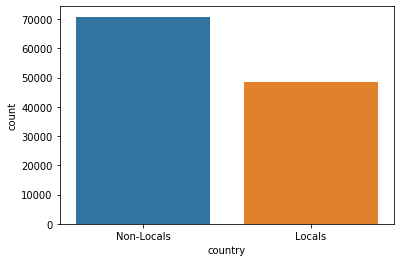

In [100]:
sns.countplot(temp_df['country'],order=pd.value_counts(temp_df['country']).iloc[:10].index)

As we dig deeper, we can see that there are more booking made by the foreign customers

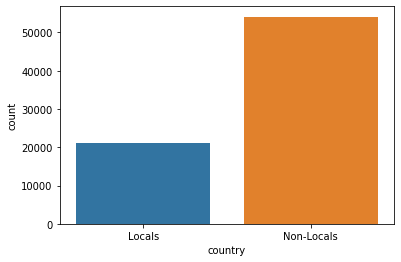

In [232]:
sns.countplot(temp_df[temp_df['is_canceled']==0]['country'])

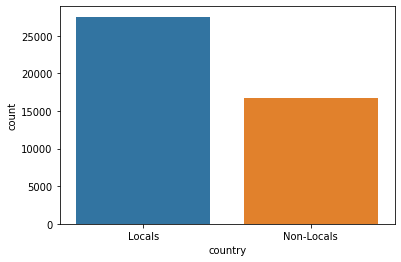

In [231]:
sns.countplot(temp_df[temp_df['is_canceled']==1]['country'])

It seems that the Foreign customers is tend to stay at the hotel compares to the local, the strategy to separate local and foreigner might be used in modelling.

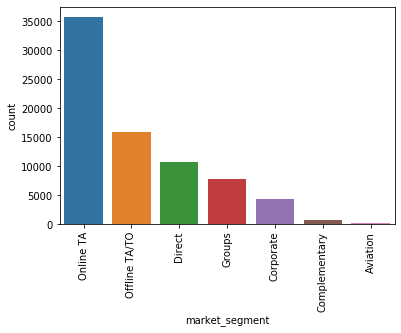

In [246]:
countplot('market_segment',0, df,8)

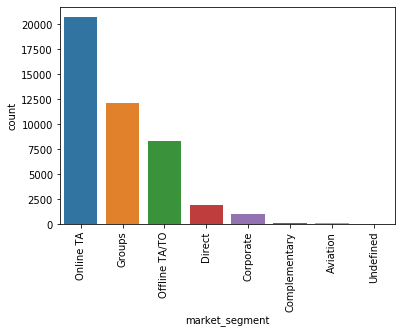

In [247]:
countplot('market_segment',1, df,8)

Market segment are mainly came from Travel Agency, besides that, customers that come from Groups are more likely to cancel the reservation, and corporate and direct tends to stay at the hotel. There's a chance this column might good for modelling

Let's try to look into what kind of people made the booking

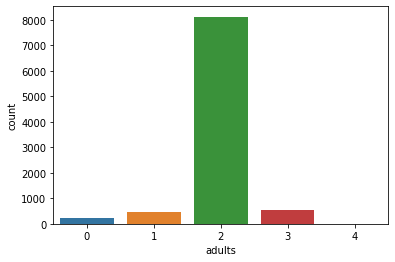

In [145]:
sns.countplot(df[(df['children']>0) | (df['babies']>0)]['adults'])

Majority of customers that brings children or babies came with 2 adults, we assume these are couples, and also the are rooms booked without an adult, we also assume that the adults are in a separate room

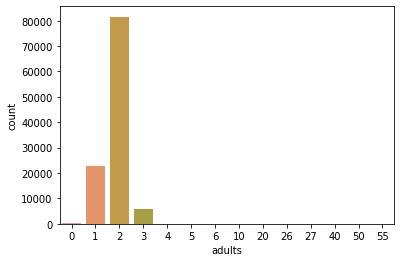

In [146]:
sns.countplot(df[(df['children']==0) & (df['babies']==0)]['adults'])

Most of the adults come in pairs

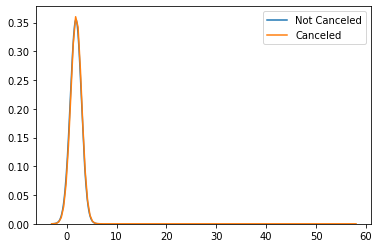

In [227]:
sns.kdeplot(df[df['is_canceled']==0]['adults'],bw=1.0,label='Not Canceled')
sns.kdeplot(df[df['is_canceled']==1]['adults'],bw=1.0,label='Canceled')

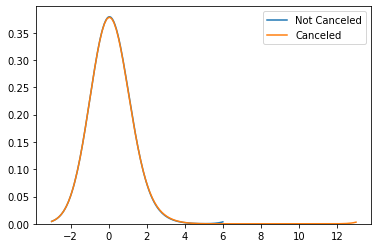

In [228]:
sns.kdeplot(df[df['is_canceled']==0]['children'],bw=1.0,label='Not Canceled')
sns.kdeplot(df[df['is_canceled']==1]['children'],bw=1.0,label='Canceled')

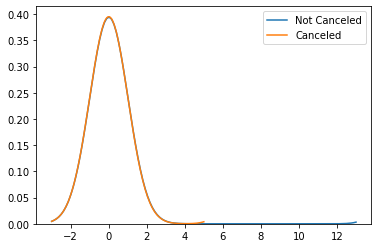

In [229]:
sns.kdeplot(df[df['is_canceled']==0]['babies'],bw=1.0,label='Not Canceled')
sns.kdeplot(df[df['is_canceled']==1]['babies'],bw=1.0,label='Canceled')

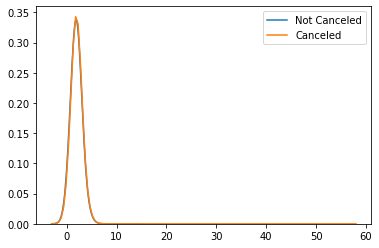

In [230]:
temp_df['total']=df['adults']+df['children']+df['babies']
sns.kdeplot(temp_df[temp_df['is_canceled']==0]['total'],bw=1.0,label='Not Canceled')
sns.kdeplot(temp_df[temp_df['is_canceled']==1]['total'],bw=1.0,label='Canceled')

It seems all types of people and number of people do not determine booking cancellation, might be consider to drop the column

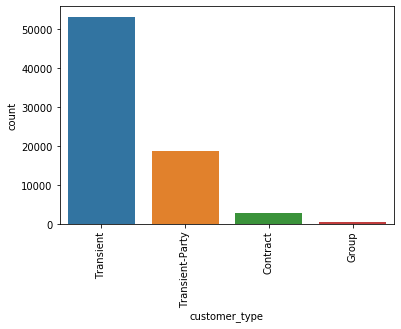

In [248]:
countplot('customer_type',0, df,8)

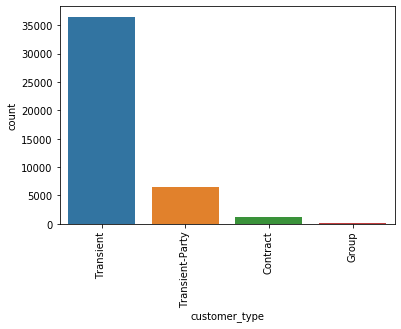

In [249]:
countplot('customer_type',1, df,8)

Most of the customer type is Transient, if we look closely, Transient party customer type tends to not cancel the reservation, furthermore customer that comes in group are more likely to stay at the hotel

#### Customer Behaviour

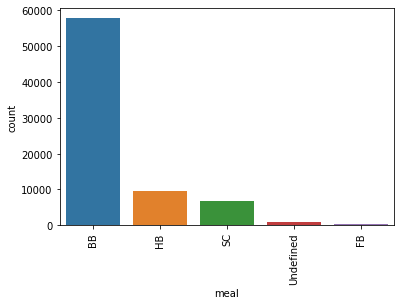

In [250]:
countplot('meal',0, df,8)

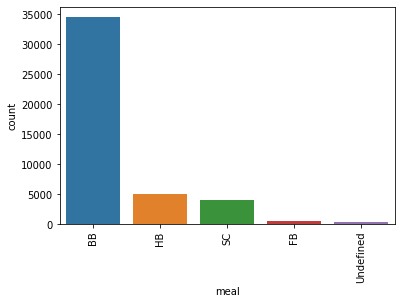

In [252]:
countplot('meal',1, df,8)

Customers mainly select the BB package, this due to the majority of customer come from Travel Agency and they only eat breakfast at the hotel before travelling throughout the City, besiedes that the hotel management might need to add some discount to other package to attract the customer. Moreover, meal package does not seem can differentiate Book cancellation on customers, might be considered to be dropped

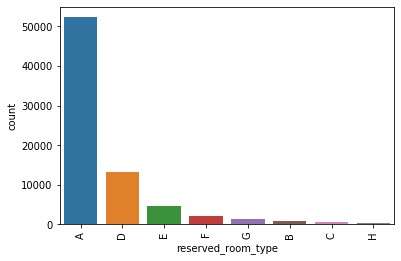

In [253]:
countplot('reserved_room_type',0, df,8)

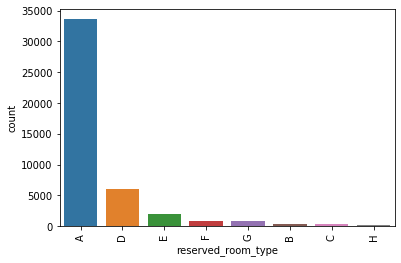

In [254]:
countplot('reserved_room_type',1, df,8)

Customers favorite room is A type followed by D, identical between cancel and not cancel, might also be dropped

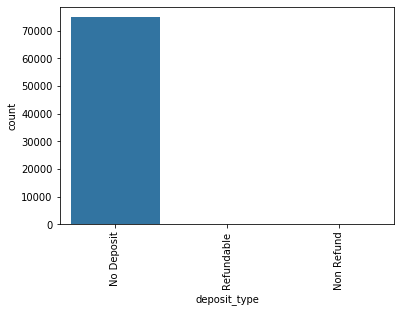

In [255]:
countplot('deposit_type',0, df,8)

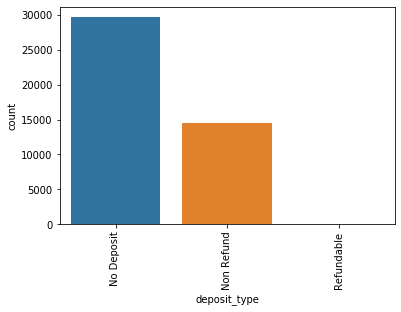

In [256]:
countplot('deposit_type',1, df,8)

As we can see customers that choose Non Refund tends to cancel the booking, there's a chance might be good for modelling

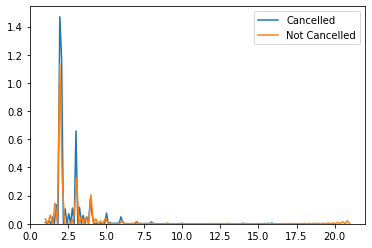

In [198]:
sns.kdeplot(df[(df['booking_changes']>0)&(df['is_canceled']==1)]['booking_changes'],label='Cancelled',bw=0.0)
sns.kdeplot(df[(df['booking_changes']>0)&(df['is_canceled']==0)]['booking_changes'],label='Not Cancelled',bw=0.0)

No significant effect on book changes to determine customers that will be cancelled the booking, this column can be dropped if necesarry

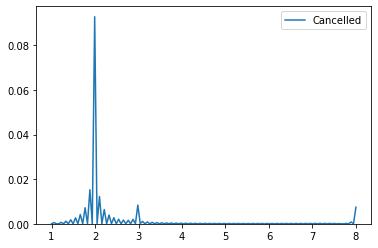

In [203]:
sns.kdeplot(df[(df['required_car_parking_spaces']>0)&(df['is_canceled']==0)]['required_car_parking_spaces'],label='Cancelled',bw=0.0)

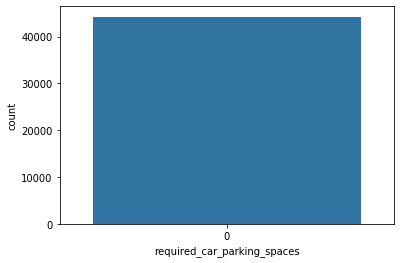

In [210]:
sns.countplot(df[df['is_canceled']==1]['required_car_parking_spaces'])

Customers mainly need 2 parking space, the hotel management needs to make sure that the parking space can hold vehicle at least double the amount of the room, this column is great to determinde whether customers will be canceled or not. But, logically this cannot works, customers that canceled the booking requires no car parking spaces since they never came, we also might consider to drop this column.

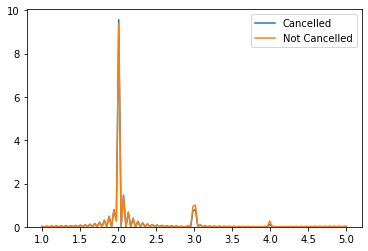

In [204]:
sns.kdeplot(df[(df['total_of_special_requests']>0)&(df['is_canceled']==1)]['total_of_special_requests'],label='Cancelled',bw=0.0)
sns.kdeplot(df[(df['total_of_special_requests']>0)&(df['is_canceled']==0)]['total_of_special_requests'],label='Not Cancelled',bw=0.0)

Customers tends to make 2 special request, and doesn't show any sign to determinte if the customer would cancel or not, this column might be dropped

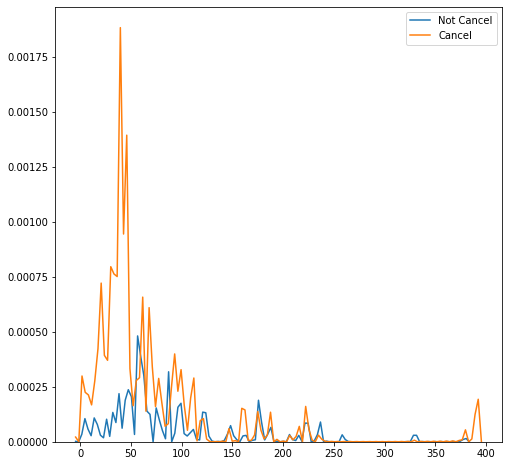

In [74]:
plt.figure(figsize=(8,8))
sns.kdeplot(df[df['is_canceled']==0]['days_in_waiting_list'],bw=1.5,label='Not Cancel')
sns.kdeplot(df[df['is_canceled']==1]['days_in_waiting_list'],bw=1.5,label='Cancel')

Most of the customer cancel the reservation between 25-50 days while in the waiting list, strong possibility is the customer has found another hotel. To avoid losing more customers, the hotel management cannot let the customer wait for more than a month. Highly chance this column might good for modelling

### Summary

    * Most of the customers are came from abroad via Travel agency and they tend to stay at the hotel. But, the local itself are more likely to cancel the booking. It might be good to set a special offer for the local and other channel besided TA
    * Most customers came in pair and required 2 parking spaces, the hotel need to make sure there's enough parking space to hold for everyone vehicle
    * Favorite room type is a with BB food package, might need more special offer in food package to attract more customers
    * Do not let customer in the waiting list for more than a month to avoid losing them 

## EDA Pre processing

Text(0.5, 0, 'Percentage (%)')

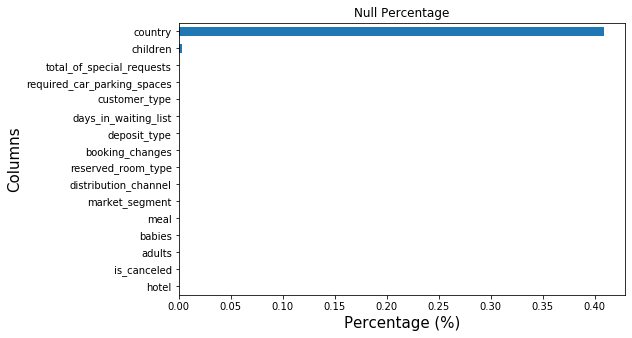

In [258]:
(df.isna().sum()/len(df)*100).sort_values(0).plot(kind='barh',figsize=(8,5),title='Null Percentage')
plt.ylabel('Columns',size=15)
plt.xlabel('Percentage (%)',size=15)

    * country: The null percentage in country nearly half of the data, might considered to be dropped or filled with PRT or the local
    * children: the percentage is small will be set to zero

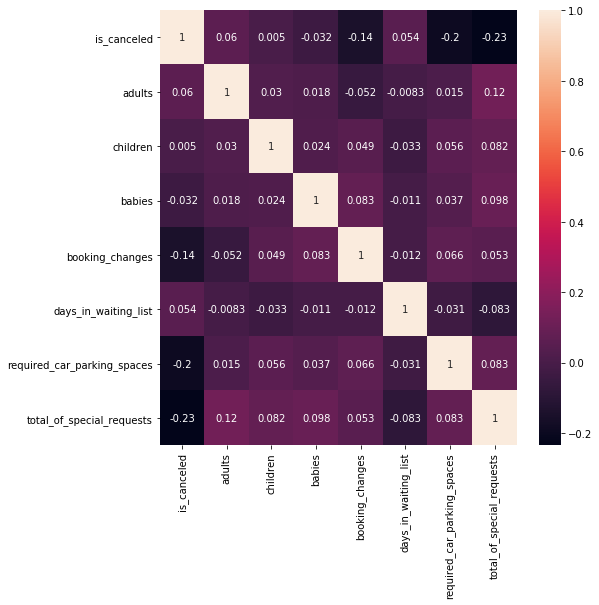

In [263]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

No feature that has significant correlation

In [268]:
df['is_canceled'].value_counts()/len(df)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

Class is imbalanced might required balancing

The scenario will be:
* Did not drop any column, set null in country to PTR and divide into local and non locals
* column hotel, customer type, country -> One hot encoder
* column meal,deposit type -> ordinal encoder
* column market_segment, distributio_channel, reserved_room -> Binary Encoder

## Preprocessing and Data Splitting

In [271]:
#Divide into locals and non locals

In [334]:
df_hotel = df.copy()
df_hotel['country'] = df_hotel['country'].apply(country)
df_hotel['children'] = df_hotel['children'].fillna(0)

In [335]:
df_hotel.head()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,Locals,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,Locals,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,Non-Locals,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,Non-Locals,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,Non-Locals,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1


In [336]:
X = df_hotel.drop('is_canceled',axis=1)
y = df_hotel['is_canceled']

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=2021)

## Transformer and Pipeline

In [338]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from imblearn.pipeline import Pipeline as ImbPipe
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import category_encoders as ce

In [339]:
ordinal_mapping=[{'col':'meal','mapping':{'Undefined':0,'SC':1,'BB':2,'HB':3,'FB':4}},
                {'col':'deposit_type','mapping':{'No Deposit':0,'Non Refund':1,'Refundable':2}}]
# ordinal_mapping = [{'col':'meal','mapping':{'Undefined':0,'SC':1,'BB':2,'HB':3,'FB':4}}]
ordinal_encoder = ce.OrdinalEncoder(mapping=ordinal_mapping)

In [340]:
transformer =ColumnTransformer([
    ('ordinal',ordinal_encoder,['meal','deposit_type']),
    ('onehot',OneHotEncoder(drop='first'),['hotel','customer_type','country']),
    ('binary',ce.BinaryEncoder(),['market_segment', 'distribution_channel', 'reserved_room_type'])
#     ('impute',SimpleImputer(strategy='constant',fill_value='Locals'),['country'])
],remainder='passthrough')
transformer.fit_transform(X)

array([[2., 0., 1., ..., 0., 0., 0.],
       [2., 0., 1., ..., 0., 0., 0.],
       [2., 0., 1., ..., 0., 0., 0.],
       ...,
       [2., 0., 0., ..., 0., 0., 4.],
       [2., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 2.]])

## Cross Validation

1. Pilihlah setidaknya 3 model machine learning yang Anda pahami untuk mendapatkan benchmark model ML untuk memprediksi apakah user akan cancel booking atau tidak!<br>
Jelaskan secara singkat cara kerja model ML yang Anda gunakan!<br><br>
a. Decision Tree: Bekerja dengan mengurutkan feature dari yang paling signifikan kemudian memilah berdasarkan feature hingga ke max depth<br>
b. KNN: Mencari tetangga terdekat dari sebuah titik sejumlah n_neighbors<br>
c. Logistic Regression: Bekerja dengan cara menghitung peluang suatu data masuk ke dalam klasifikasi 1 atau 0<br>

2. Ada 2 jenis kesalahan yang mungkin terjadi dalam model ML di studi kasus ini<br>
a. Pilih jenis kesalahan yang paling berpengaruh pada kerugian finansial perusahaan dan jelaskan alasan pilihan Anda!<br>
Jenis kesalah yang merugikan secara finansial adalah <b>Model memprediksi user akan cancel booking (membatalkan pesanan), padahal sebenarnya/realisasinya user tidak membatalkan pesanan</b>. Hal ini dapat menyebabkan kerugian karna kehilangan calon customer yang akan menginap di hotel<br><br>
b. Pilih evaluation metric yang bisa menekan jenis kesalahan yang Anda pilih! Berikan alasan!<br>
Metric yang dipilih Precision untuk menghindari model memprediksi cancel booking yang tidak sesuai

In [316]:
tree =  DecisionTreeClassifier(max_depth=5)
logreg = LogisticRegression(class_weight='balanced')
knn = KNeighborsClassifier()
models = [tree,logreg,knn]
balancing = [NearMiss(),SMOTE(random_state=2021),RandomOverSampler(random_state=2021),RandomUnderSampler(random_state=2021)]
# poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

In [346]:
def scoring(models,transformer,balancing):
    skfold = StratifiedKFold(n_splits=5)
    df = pd.DataFrame(columns=['Name','1','2','3','4','5','mean','std'])
    for i in models:
        estimator = ImbPipe([
            ('transformer',transformer),
            ('model',i)
        ])
        arr = cross_val_score(estimator, X_train, y_train, scoring='precision',cv=skfold,n_jobs=-1)
        df = df.append({'Name':str(estimator[-1]), '1':arr[0], '2':arr[1], '3':arr[2], '4':arr[3], '5':arr[4], 'mean':arr.mean(),'std':arr.std()}, ignore_index=True)
    return df.sort_values('mean',ascending=False)

In [347]:
scoring(models,transformer,balancing)

,Name,1,2,3,4,5,mean,std
2,KNeighborsClassifier(),0.730852,0.740571,0.720437,0.746372,0.739893,0.735625,0.009074
0,DecisionTreeClassifier(max_depth=5),0.714449,0.728944,0.738051,0.733717,0.739721,0.730976,0.009070
1,LogisticRegression(class_weight='balanced'),0.692814,0.673529,0.680672,0.691856,0.685566,0.684887,0.007192


Benchmark terbaik yang akan dipilih adalah KNN dengan mean tertinggi

## Model Testing

In [352]:
knn = KNeighborsClassifier()
pipeline = Pipeline([
    ('transformer',transformer),
    ('model',knn)
])


In [354]:
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

In [359]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84     15033
           1       0.72      0.70      0.71      8845

    accuracy                           0.79     23878
   macro avg       0.78      0.77      0.77     23878
weighted avg       0.79      0.79      0.79     23878



Terdapat penurunan 1 % dari cross validasi menjadi 72%

## Hyperparameter Tuning

In [362]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [376]:
knn = KNeighborsClassifier(n_jobs=-1)
estimator = Pipeline([
    ('transformer',transformer),
    ('model',knn)
])


In [377]:
hyperparam_space={
    'model__n_neighbors':[3,5,7]
#     'model__weights':['uniform', 'distance']
}

In [378]:
grid_search = GridSearchCV(
estimator,
param_grid=hyperparam_space,
cv=StratifiedKFold(n_splits=5),
scoring='precision',
n_jobs=-1)

In [ ]:
grid_search.fit(X_train,y_train)

In [ ]:
print(grid_search.best_score_)

In [ ]:
print(grid_search.best_params_)

In [ ]:
grid_search.best_estimator_.fit(X_train,y_train)
y_pred=grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test,y_pred))

## Summary Testing

Setelah Anda memilih benchmark model terbaik, lakukan hyperparameter tunning untuk meningkatkan preforma model Anda! Parameter apa saja yang anda pilih untuk tunning? <br>Jelaskan maksud dari tiap-tiap parameter tersebut
1. n_neighbors = untuk menentukan berapa jumlah tetangga yang diambil untuk menentukan classnya
2. weight = merupakan algoritma untuk memberikan perhatian khusus ke point tertentu atau sebaliknya

Bagaimana performa model Anda setelah Hyper-parameter Tuning? Apakah ada tahap lanjutan yang bisa Anda lakukan untuk meningkatkan performa model lebih jauh? Buat kesimpulan akhir, model mana yang akan Anda pakai untuk memprediksi apakah user akan cancel booking atau tidak!

Performa hyper parameter tuning <br>
Tahap yang dapat dilakukan:
- Menambah parameter di Hyperparameter Tuning
- Feature engineering, dengan memasukkan fitur yang signifikan saja
- Menambahkan balancing atau scaling terdapat dataset
- Menambah ensemble model apabila diperlukan